In [ ]:
#importing basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates

In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
cd /content/drive/"MyDrive/"

/content/drive/MyDrive


In [ ]:
dataset = pd.read_csv('Colab Notebooks/Linear Regression/time_series_covid19_deaths_global.csv')

#/content/drive/MyDrive/Colab Notebooks/synchronousmachine.csv

In [ ]:
dataset

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,1/2/22,1/3/22,1/4/22,1/5/22,1/6/22,1/7/22,1/8/22,1/9/22,1/10/22,1/11/22
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,...,7361,7364,7365,7367,7367,7368,7369,7373,7373,7374
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,3220,3220,3224,3224,3228,3233,3233,3240,3241,3247
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,6291,6298,6303,6310,6318,6325,6330,6339,6349,6363
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,140,140,141,141,141,141,141,141,141,141
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,1772,1775,1778,1789,1799,1809,1819,1826,1832,1840
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275,NaN,Vietnam,14.058324,108.277199,0,0,0,0,0,0,...,32831,33021,33245,33475,33644,33877,34117,34319,34531,34787
276,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,...,4919,4919,4947,4954,4954,4954,4954,4954,4987,4993
277,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,1984,1984,1984,1985,1986,1986,1986,1986,1986,1987
278,NaN,Zambia,-13.133897,27.849332,0,0,0,0,0,0,...,3743,3753,3762,3772,3782,3790,3798,3812,3817,3825


Analysing the dataset

In [ ]:
dataset.shape

(280, 725)

In [ ]:
type(dataset)

pandas.core.frame.DataFrame

In [ ]:
dataf= pd.DataFrame(dataset)

In [ ]:
dataf.describe()

,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,1/2/22,1/3/22,1/4/22,1/5/22,1/6/22,1/7/22,1/8/22,1/9/22,1/10/22,1/11/22
count,278.000000,278.000000,280.000000,280.000000,280.000000,280.000000,280.000000,280.000000,280.000000,280.000000,...,280.000000,280.000000,280.000000,280.000000,280.000000,280.000000,280.000000,280.000000,280.000000,280.000000
mean,20.156042,21.788955,0.060714,0.064286,0.092857,0.150000,0.200000,0.292857,0.467857,0.475000,...,19444.017857,19465.078571,19492.853571,19520.617857,19546.539286,19572.500000,19590.464286,19604.596429,19627.546429,19658.525000
std,25.283318,76.200169,1.015944,1.017487,1.436326,2.391517,3.109011,4.542900,7.470302,7.470809,...,76275.508809,76362.649463,76483.215265,76590.488943,76691.519418,76817.889761,76870.765077,76920.171951,77015.771337,77148.692281
min,-51.796300,-178.116500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.643279,-37.713675,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,22.750000,22.750000,22.750000,22.750000,22.750000,22.750000,22.750000,22.750000,23.750000,25.500000
50%,21.517170,20.921188,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,708.500000,709.500000,709.500000,710.500000,710.500000,713.000000,721.000000,726.000000,727.500000,728.500000
75%,40.393350,84.992575,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,7355.000000,7355.750000,7365.250000,7367.500000,7367.750000,7369.000000,7369.750000,7372.250000,7375.250000,7377.000000
max,71.706900,178.065000,17.000000,17.000000,24.000000,40.000000,52.000000,76.000000,125.000000,125.000000,...,826289.000000,827977.000000,830134.000000,832120.000000,833990.000000,836605.000000,837266.000000,837665.000000,839500.000000,842141.000000


In [ ]:
col = list(dataset.columns.values)
print(col)

['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20', '1/24/20', '1/25/20', '1/26/20', '1/27/20', '1/28/20', '1/29/20', '1/30/20', '1/31/20', '2/1/20', '2/2/20', '2/3/20', '2/4/20', '2/5/20', '2/6/20', '2/7/20', '2/8/20', '2/9/20', '2/10/20', '2/11/20', '2/12/20', '2/13/20', '2/14/20', '2/15/20', '2/16/20', '2/17/20', '2/18/20', '2/19/20', '2/20/20', '2/21/20', '2/22/20', '2/23/20', '2/24/20', '2/25/20', '2/26/20', '2/27/20', '2/28/20', '2/29/20', '3/1/20', '3/2/20', '3/3/20', '3/4/20', '3/5/20', '3/6/20', '3/7/20', '3/8/20', '3/9/20', '3/10/20', '3/11/20', '3/12/20', '3/13/20', '3/14/20', '3/15/20', '3/16/20', '3/17/20', '3/18/20', '3/19/20', '3/20/20', '3/21/20', '3/22/20', '3/23/20', '3/24/20', '3/25/20', '3/26/20', '3/27/20', '3/28/20', '3/29/20', '3/30/20', '3/31/20', '4/1/20', '4/2/20', '4/3/20', '4/4/20', '4/5/20', '4/6/20', '4/7/20', '4/8/20', '4/9/20', '4/10/20', '4/11/20', '4/12/20', '4/13/20', '4/14/20', '4/15/20', '4/16/20', '4/17/20', '4/18/20', '4/19/2

In [ ]:
col_value = (list(dataf.sum(axis = 0, skipna = True)))
#print(col_value)
df1 = pd.DataFrame(list(zip(col, col_value)),columns =['Title', 'Values'])

#df1.set_index('Title',inplace=True)
#print(df1)
#df1.drop(df1.index[["Province/State"]])

data = df1.drop(df1.index)
print(df1)



              Title                                             Values
0    Province/State  AfghanistanAlbaniaAlgeriaAndorraAngolaAntigua ...
1    Country/Region                                         5603.37955
2               Lat                                        6057.329414
3              Long                                                 17
4           1/22/20                                                 18
..              ...                                                ...
719          1/6/22                                            5480300
720          1/7/22                                            5485330
721          1/8/22                                            5489287
722          1/9/22                                            5495713
723         1/10/22                                            5504387

[724 rows x 2 columns]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


In [ ]:
col1 = list(df1.columns.values)
print(col1)


['Title', 'Values']


In [ ]:
x_value=df1.iloc[4:700,0:1]
y_value=df1.iloc[4:700,1:2]

In [ ]:
x_value

,Title
4,1/22/20
5,1/23/20
6,1/24/20
7,1/25/20
8,1/26/20
...,...
695,12/13/21
696,12/14/21
697,12/15/21
698,12/16/21


In [ ]:

y_value

,Values
4,18
5,26
6,42
7,56
8,82
...,...
695,5322675
696,5331795
697,5339073
698,5345964


In [ ]:
#cleaning the dataset
#remove the na values
training_dataset=df1
cleaned_dataset=training_dataset.dropna()

In [ ]:
cleaned_dataset.shape

(724, 2)

In [ ]:
cleaned_dataset

,Title,Values
0,Province/State,AfghanistanAlbaniaAlgeriaAndorraAngolaAntigua ...
1,Country/Region,5603.37955
2,Lat,6057.329414
3,Long,17
4,1/22/20,18
...,...,...
719,1/6/22,5480300
720,1/7/22,5485330
721,1/8/22,5489287
722,1/9/22,5495713


In [ ]:
x_new = cleaned_dataset['Title']

In [ ]:
y_new = cleaned_dataset['Values']

In [ ]:
x_value1=cleaned_dataset.iloc[4:,0:1]
y_value1=cleaned_dataset.iloc[4:,1:2]
print(x_value1)


       Title
4    1/22/20
5    1/23/20
6    1/24/20
7    1/25/20
8    1/26/20
..       ...
719   1/6/22
720   1/7/22
721   1/8/22
722   1/9/22
723  1/10/22

[720 rows x 1 columns]


In [ ]:
x_train = x_value1.values.reshape(x_value1.size)

In [ ]:
y_train = y_value1.values.reshape(y_value1.size)

In [ ]:
dates = x_value1['Title']
#print(dates)
date_format = [pd.to_datetime(d) for d in dates]
print(date_format)

[Timestamp('2020-01-22 00:00:00'), Timestamp('2020-01-23 00:00:00'), Timestamp('2020-01-24 00:00:00'), Timestamp('2020-01-25 00:00:00'), Timestamp('2020-01-26 00:00:00'), Timestamp('2020-01-27 00:00:00'), Timestamp('2020-01-28 00:00:00'), Timestamp('2020-01-29 00:00:00'), Timestamp('2020-01-30 00:00:00'), Timestamp('2020-01-31 00:00:00'), Timestamp('2020-02-01 00:00:00'), Timestamp('2020-02-02 00:00:00'), Timestamp('2020-02-03 00:00:00'), Timestamp('2020-02-04 00:00:00'), Timestamp('2020-02-05 00:00:00'), Timestamp('2020-02-06 00:00:00'), Timestamp('2020-02-07 00:00:00'), Timestamp('2020-02-08 00:00:00'), Timestamp('2020-02-09 00:00:00'), Timestamp('2020-02-10 00:00:00'), Timestamp('2020-02-11 00:00:00'), Timestamp('2020-02-12 00:00:00'), Timestamp('2020-02-13 00:00:00'), Timestamp('2020-02-14 00:00:00'), Timestamp('2020-02-15 00:00:00'), Timestamp('2020-02-16 00:00:00'), Timestamp('2020-02-17 00:00:00'), Timestamp('2020-02-18 00:00:00'), Timestamp('2020-02-19 00:00:00'), Timestamp('20

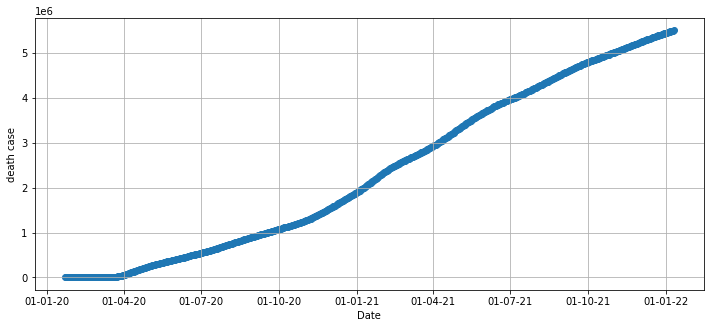

In [ ]:
fig, ax = plt.subplots(figsize=(12, 5 ))
ax.grid()
ax.scatter(date_format,y_value1['Values'])
ax.set(xlabel="Date",ylabel="death case")
date_form = DateFormatter('%d-%m-%y')
#print(date_form)
ax.xaxis.set_major_formatter(date_form)
#ax.xaxis.set_major_locator(mdates.DayLocator(interval = 15))
plt.show()

In [ ]:
df1['Time'] = np.arange(len(df1.index))

In [ ]:
print(df1)

              Title                                             Values  Time
0    Province/State  AfghanistanAlbaniaAlgeriaAndorraAngolaAntigua ...     0
1    Country/Region                                         5603.37955     1
2               Lat                                        6057.329414     2
3              Long                                                 17     3
4           1/22/20                                                 18     4
..              ...                                                ...   ...
719          1/6/22                                            5480300   719
720          1/7/22                                            5485330   720
721          1/8/22                                            5489287   721
722          1/9/22                                            5495713   722
723         1/10/22                                            5504387   723

[724 rows x 3 columns]


In [ ]:
from sklearn.linear_model import LinearRegression

# Training data
X = df1.loc[4:, ['Time']]  # features
y = df1.loc[4:, 'Values']  # target

# Train the model
model = LinearRegression()
model.fit(X, y)

# Store the fitted values as a time series with the same time index as
# the training data
y_pred = pd.Series(model.predict(X), index=X.index)

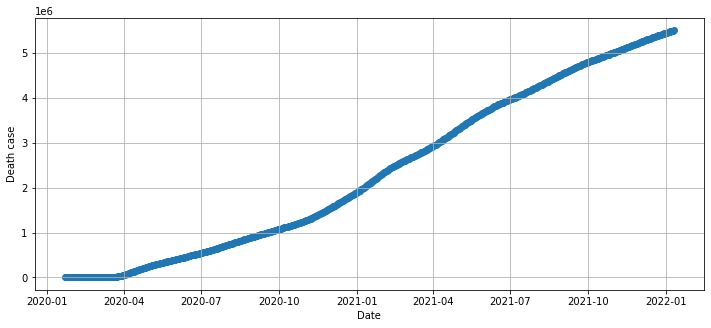

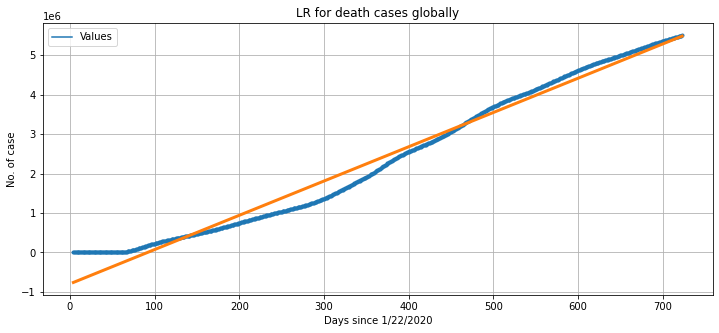

In [ ]:
plot_params = dict(
    style=".-",
    legend=True,
)

fig, ax = plt.subplots(figsize=(12, 5 ))
ax.grid()
ax.scatter(date_format,y_value1['Values'])
ax.set(xlabel="Date",ylabel="Death case")

fig, ax = plt.subplots(figsize=(12, 5 ))
ax = y.plot(**plot_params)
ax = y_pred.plot(ax=ax, linewidth=3)
ax.set_title('LR for death cases globally');
ax.set(xlabel="Days since 1/22/2020",ylabel="No. of case")
ax.grid();

